In [1]:
from google.colab import files
uploaded = files.upload()

Saving abstract2.csv to abstract2.csv


In [2]:
import numpy as np
import pandas as pd
import csv
from csv import reader

Loading the pre processed Abstract Dataset

In [3]:
data = pd.read_csv("abstract2.csv")
data.head()

,abstract
0,zhou et al natur hoffmann et al cell identifi ...
1,high incid thromboembol diseas particular veno...
2,2019 sever acut respiratori syndrom coronaviru...
3,2019 sever acut respiratori syndrom coronaviru...
4,purpos primari purpos present systemat review ...


In [4]:
len(data.axes[0])

85885

In [5]:
abstract = []
with open ("abstract2.csv",'r') as read_obj:
  csv_reader=reader(read_obj)
  for row in csv_reader:
    abstract.append(row)
print(len(abstract))

85886


In [6]:
print(abstract[:10])

[['abstract'], ['zhou et al natur hoffmann et al cell identifi ace2 sarscov2 receptor latter show entri mechan depend cellular serin proteas tmprss2 result may explain proinflammatori cytokin releas via associ angiotestin ii pathway possibl therapeut target via il6stat3 axi'], ['high incid thromboembol diseas particular venou thromboembol vte emerg import consider hospit critic ill patient coronaviru diseas 2019 covid19 coagulopathi covid19 postul result interact inflammatori immun system coagul system manifest cytokin storm associ hyperinflamm coagul platelet activ uniqu characterist vte hospit critic ill patient covid19 includ high incid vte especi pulmonari embol compar histor controlsth find situ pulmonari embol associ microthrombi suggest thrombot microangiopath process addit classic macrovessel diseaseand import clinic perspect unusu high rate vte report despit standard thromboprophylaxi rais possibl intermedi weightbas heparin dose may effect fix dose thromboprophylaxi highrisk 

In [7]:
abstract=abstract[1:]

In [8]:
import nltk
nltk.download("punkt")
nltk.download("popular")
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    | 

In [9]:
abs_final=[]
for i in abstract:
  abs_final.append(i[0])

#Tokenization (final step in our cleaning of data) is performed using Regular Expression Tokeinzer from nltk package. 
tokenizer = RegexpTokenizer(r'\w+') #matches all word characters until a non word character like " " is found.
text=[]
for i in abs_final:
  #tokenize the document string
  tokens=tokenizer.tokenize(i)
  text.append(tokens)

In [10]:
#creating bag of words parameter
import gensim
from gensim import corpora,models

#Dictionary() function creates a term dictionary of our corpus, where every unique term is assigned an index and word count is also maintained.
dictionary = corpora.Dictionary(text)

# print(dictionary.token2id) can be used to see each unique id assigned to each unique word.

#Converts list of documents (corpus) into bag of words using dictionary prepared above. Output is a list of list of tuples with first tern the unique id and the second term the frequency.
doc_term_matrix = [dictionary.doc2bow(abst, allow_update=True) for abst in text]

**Number of Topics=4**

In [12]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=4, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.011*"viru" + 0.011*"infect" + 0.011*"cell" + 0.009*"protein" + 0.008*"viral" + 0.007*"virus" + 0.006*"use" + 0.006*"human" + 0.006*"studi" + 0.005*"detect"
Topic: 1 
Words: 0.012*"health" + 0.012*"covid19" + 0.008*"pandem" + 0.007*"use" + 0.007*"diseas" + 0.005*"studi" + 0.005*"model" + 0.005*"case" + 0.005*"data" + 0.005*"public"
Topic: 2 
Words: 0.024*"patient" + 0.010*"covid19" + 0.010*"de" + 0.008*"studi" + 0.007*"infect" + 0.006*"respiratori" + 0.006*"hospit" + 0.006*"p" + 0.006*"clinic" + 0.006*"result"
Topic: 3 
Words: 0.020*"patient" + 0.016*"covid19" + 0.011*"diseas" + 0.009*"infect" + 0.007*"treatment" + 0.007*"sever" + 0.007*"clinic" + 0.007*"use" + 0.007*"respiratori" + 0.006*"coronaviru"


**Number of Topics=5**

In [13]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=5, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.012*"cell" + 0.011*"infect" + 0.011*"viru" + 0.009*"protein" + 0.008*"viral" + 0.006*"human" + 0.006*"virus" + 0.006*"use" + 0.006*"studi" + 0.005*"activ"
Topic: 1 
Words: 0.014*"covid19" + 0.010*"health" + 0.009*"diseas" + 0.008*"case" + 0.007*"studi" + 0.007*"infect" + 0.006*"outbreak" + 0.006*"model" + 0.006*"pandem" + 0.006*"use"
Topic: 2 
Words: 0.010*"use" + 0.009*"health" + 0.009*"covid19" + 0.008*"pandem" + 0.007*"care" + 0.006*"provid" + 0.006*"develop" + 0.006*"diseas" + 0.005*"system" + 0.005*"research"
Topic: 3 
Words: 0.029*"patient" + 0.015*"covid19" + 0.011*"respiratori" + 0.011*"infect" + 0.008*"sever" + 0.008*"diseas" + 0.008*"clinic" + 0.008*"studi" + 0.006*"case" + 0.006*"test"
Topic: 4 
Words: 0.057*"de" + 0.026*"la" + 0.021*"le" + 0.017*"et" + 0.015*"en" + 0.011*"l" + 0.009*"d" + 0.008*"à" + 0.008*"un" + 0.007*"une"


**Number of Topics=6**

In [14]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=6, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.013*"health" + 0.012*"covid19" + 0.009*"pandem" + 0.008*"diseas" + 0.007*"use" + 0.005*"model" + 0.005*"public" + 0.005*"data" + 0.005*"provid" + 0.005*"outbreak"
Topic: 1 
Words: 0.027*"patient" + 0.016*"covid19" + 0.008*"studi" + 0.008*"care" + 0.008*"hospit" + 0.008*"p" + 0.007*"risk" + 0.007*"result" + 0.006*"95" + 0.006*"ci"
Topic: 2 
Words: 0.017*"cell" + 0.013*"protein" + 0.011*"infect" + 0.008*"viru" + 0.008*"viral" + 0.008*"activ" + 0.007*"immun" + 0.007*"express" + 0.006*"respons" + 0.005*"studi"
Topic: 3 
Words: 0.028*"patient" + 0.016*"covid19" + 0.015*"infect" + 0.015*"respiratori" + 0.012*"sever" + 0.012*"diseas" + 0.010*"clinic" + 0.009*"case" + 0.008*"acut" + 0.008*"coronaviru"
Topic: 4 
Words: 0.036*"de" + 0.015*"la" + 0.014*"le" + 0.011*"et" + 0.009*"en" + 0.007*"l" + 0.006*"use" + 0.006*"d" + 0.006*"patient" + 0.005*"à"
Topic: 5 
Words: 0.012*"viru" + 0.010*"detect" + 0.009*"virus" + 0.009*"use" + 0.008*"sampl" + 0.007*"infect" + 0.007*"studi" + 0.

**Number of Topics=7**

In [15]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=7, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.017*"patient" + 0.016*"diseas" + 0.016*"covid19" + 0.015*"infect" + 0.013*"sever" + 0.009*"respiratori" + 0.008*"acut" + 0.008*"clinic" + 0.007*"sarscov2" + 0.007*"coronaviru"
Topic: 1 
Words: 0.016*"infect" + 0.015*"respiratori" + 0.013*"viru" + 0.012*"detect" + 0.010*"test" + 0.009*"viral" + 0.009*"virus" + 0.009*"sampl" + 0.009*"patient" + 0.008*"influenza"
Topic: 2 
Words: 0.011*"health" + 0.010*"diseas" + 0.008*"covid19" + 0.006*"pandem" + 0.006*"public" + 0.006*"use" + 0.006*"outbreak" + 0.005*"develop" + 0.005*"data" + 0.005*"research"
Topic: 3 
Words: 0.025*"patient" + 0.015*"covid19" + 0.012*"studi" + 0.009*"p" + 0.007*"hospit" + 0.007*"associ" + 0.007*"group" + 0.007*"age" + 0.007*"result" + 0.007*"95"
Topic: 4 
Words: 0.013*"use" + 0.008*"model" + 0.007*"studi" + 0.006*"effect" + 0.005*"result" + 0.005*"method" + 0.005*"differ" + 0.003*"also" + 0.003*"show" + 0.003*"develop"
Topic: 5 
Words: 0.019*"covid19" + 0.017*"patient" + 0.013*"care" + 0.013*"pandem"

In [16]:
#Trying for number of passes=50 to get even better results.
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=7, id2word=dictionary, passes=50, workers=2)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.012*"model" + 0.010*"use" + 0.008*"data" + 0.007*"case" + 0.006*"covid19" + 0.006*"studi" + 0.006*"number" + 0.006*"result" + 0.005*"epidem" + 0.005*"countri"
Topic: 1 
Words: 0.030*"patient" + 0.019*"covid19" + 0.013*"studi" + 0.009*"p" + 0.009*"group" + 0.008*"associ" + 0.007*"hospit" + 0.007*"risk" + 0.007*"age" + 0.007*"result"
Topic: 2 
Words: 0.022*"cell" + 0.014*"infect" + 0.010*"immun" + 0.009*"activ" + 0.009*"respons" + 0.008*"express" + 0.007*"effect" + 0.006*"diseas" + 0.006*"viral" + 0.005*"mechan"
Topic: 3 
Words: 0.014*"viru" + 0.012*"protein" + 0.009*"vaccin" + 0.008*"use" + 0.008*"virus" + 0.008*"viral" + 0.007*"human" + 0.007*"sequenc" + 0.006*"rna" + 0.006*"studi"
Topic: 4 
Words: 0.017*"covid19" + 0.016*"health" + 0.013*"pandem" + 0.009*"diseas" + 0.009*"care" + 0.007*"use" + 0.006*"patient" + 0.006*"provid" + 0.006*"emerg" + 0.006*"public"
Topic: 5 
Words: 0.061*"de" + 0.028*"la" + 0.022*"le" + 0.018*"et" + 0.016*"en" + 0.012*"l" + 0.010*"patient"

**Number of Topics=8**

In [17]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=8, id2word=dictionary, passes=13, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.018*"infect" + 0.017*"diseas" + 0.012*"sever" + 0.011*"covid19" + 0.011*"respiratori" + 0.011*"treatment" + 0.011*"sarscov2" + 0.009*"patient" + 0.009*"coronaviru" + 0.008*"acut"
Topic: 1 
Words: 0.017*"protein" + 0.016*"cell" + 0.010*"viru" + 0.008*"viral" + 0.008*"activ" + 0.007*"use" + 0.006*"express" + 0.006*"gene" + 0.006*"rna" + 0.006*"infect"
Topic: 2 
Words: 0.015*"infect" + 0.015*"detect" + 0.014*"viru" + 0.013*"respiratori" + 0.011*"sampl" + 0.011*"test" + 0.010*"influenza" + 0.009*"virus" + 0.009*"viral" + 0.007*"use"
Topic: 3 
Words: 0.039*"patient" + 0.019*"covid19" + 0.011*"case" + 0.009*"hospit" + 0.009*"studi" + 0.008*"sever" + 0.008*"diseas" + 0.007*"clinic" + 0.007*"day" + 0.007*"p"
Topic: 4 
Words: 0.013*"model" + 0.010*"transmiss" + 0.009*"human" + 0.008*"merscov" + 0.007*"bat" + 0.007*"studi" + 0.006*"use" + 0.006*"infect" + 0.006*"anim" + 0.005*"result"
Topic: 5 
Words: 0.012*"care" + 0.012*"patient" + 0.011*"covid19" + 0.010*"use" + 0.009*"pand

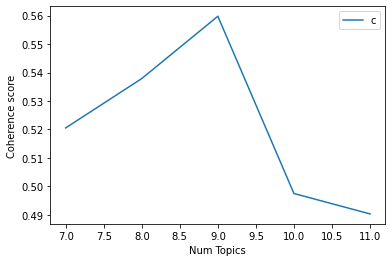

In [18]:
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=1, workers=2)
        #model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=text, start=7, limit=12, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=12; start=7; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()